In [1]:
import numpy as np
from matplotlib import pyplot as plt
from evtools.sim_tools.process_evcdr_multiple import ProcessEVCDRMultiple

evcdr = ProcessEVCDRMultiple(folder_index=2, backend='ibm_sherbrooke', batches=[1,2])
evcdr.n_resamples = 50_000
evcdr.get_results(
    neighbourhood_list=[4,4,4,3,3,3,3,3,3,3,3,3,3,3,3],
    hamming_list      =[0,0,1,2,3,4,6,5,7,7,7,7,7,7,8],
    force_Z_shift_list=[False,False,False,True,True,True,True,False,False,True,True,True,False,True,True]
)

----------------------------
| Processing step number 1 |
----------------------------
>> loaded qpu job at step=1, batch=1
	>> retrieved measurement data
	>> extracted noisy expectation values
>> loaded qpu job at step=1, batch=2
	>> retrieved measurement data
	>> extracted noisy expectation values
----------------------------
| Processing step number 2 |
----------------------------


/Users/timw/Research/EVTools/evtools/sim_tools/process_evcdr_multiple.py:501: RuntimeWarning: invalid value encountered in sqrt
  deviation = np.sqrt(exp_X_square*exp_X_reciprocal_square-(exp_X*exp_X_reciprocal)**2)


>> loaded qpu job at step=2, batch=1
	>> retrieved measurement data
	>> extracted noisy expectation values
>> loaded qpu job at step=2, batch=2
	>> retrieved measurement data
	>> extracted noisy expectation values
----------------------------
| Processing step number 3 |
----------------------------
>> loaded qpu job at step=3, batch=1
	>> retrieved measurement data
	>> extracted noisy expectation values
>> loaded qpu job at step=3, batch=2
	>> retrieved measurement data
	>> extracted noisy expectation values
----------------------------
| Processing step number 4 |
----------------------------
>> loaded qpu job at step=4, batch=1
	>> retrieved measurement data
	>> extracted noisy expectation values
>> loaded qpu job at step=4, batch=2
	>> retrieved measurement data
	>> extracted noisy expectation values
----------------------------
| Processing step number 5 |
----------------------------


/Users/timw/Research/EVTools/evtools/sim_tools/process_evcdr_multiple.py:403: RuntimeWarning: divide by zero encountered in reciprocal
  exp_X_reciprocal        = np.mean((1+self.X_vals_bootstrapped)**-1, axis=-1)
/Users/timw/Research/EVTools/evtools/sim_tools/process_evcdr_multiple.py:404: RuntimeWarning: divide by zero encountered in power
  exp_X_reciprocal_square = np.mean((1+self.X_vals_bootstrapped)**-2, axis=-1)
/Users/timw/Research/EVTools/evtools/sim_tools/process_evcdr_multiple.py:408: RuntimeWarning: invalid value encountered in subtract
  deviation = np.sqrt(exp_Z_square*exp_X_reciprocal_square-(exp_Z*exp_X_reciprocal)**2)
/Users/timw/Research/EVTools/evtools/sim_tools/process_evcdr_multiple.py:439: RuntimeWarning: divide by zero encountered in reciprocal
  exp_X_reciprocal        = np.mean((1+self.X_vals_bootstrapped)**-1, axis=-1)
/Users/timw/Research/EVTools/evtools/sim_tools/process_evcdr_multiple.py:440: RuntimeWarning: divide by zero encountered in power
  exp_X_recip

>> loaded qpu job at step=5, batch=1
	>> retrieved measurement data
	>> extracted noisy expectation values
>> loaded qpu job at step=5, batch=2
	>> retrieved measurement data
	>> extracted noisy expectation values
----------------------------
| Processing step number 6 |
----------------------------
>> loaded qpu job at step=6, batch=1
	>> retrieved measurement data
	>> extracted noisy expectation values
>> loaded qpu job at step=6, batch=2
	>> retrieved measurement data
	>> extracted noisy expectation values
----------------------------
| Processing step number 7 |
----------------------------
>> loaded qpu job at step=7, batch=1
	>> retrieved measurement data
	>> extracted noisy expectation values
>> loaded qpu job at step=7, batch=2
	>> retrieved measurement data
	>> extracted noisy expectation values
----------------------------
| Processing step number 8 |
----------------------------
>> loaded qpu job at step=8, batch=1
	>> retrieved measurement data
	>> extracted noisy expectati

In [2]:
def average_without_outliers(arr,stdin,n_devs=100,pick=None):
    if pick is not None:
        arr = np.asarray(arr)
        return arr[:,pick],np.zeros_like(arr[:,pick])
    std = np.std(arr, axis=1)
    avg = np.mean(arr, axis=1)
    mask_outliers = abs(arr - avg.reshape(-1,1)) < n_devs*std.reshape(-1,1)+1e-10
    avgout = []
    stdout = []
    for row,rowstd,mask in zip(arr,stdin,mask_outliers):
        avgout.append(np.mean(row[mask]))
        stdout.append(np.mean(rowstd[mask][~np.isnan(rowstd[mask])]))
    return np.array(avgout),np.array(stdout)

order = ['','','','_Z_only','_Z_only','','_X_only', '_Z_only','_Z_only','_Z_only','','','_Z_only','_Z_only','_Z_only']
outlier_num_devs = 3
clifford_interpolated,clifford_std=[],[]
clifford_masks = []
for which,step in zip(order,evcdr.steps):
    step = str(step)    
    n_points = evcdr.results['clifford_data']['Z']['noisy'][step][0].shape[0]
    X_sosr = evcdr.results['clifford_data']['X']['sosr'][step]
    Z_sosr = evcdr.results['clifford_data']['Z']['sosr'][step]
    cliff_res,cliff_std = evcdr.results['expvals'][f'clifford_interpolated{which}'][step]
    clifford_mask = np.ones_like(cliff_res, dtype=bool)
    clifford_masks.append(clifford_mask)
    cliff_masked = np.array(cliff_res[clifford_mask]).reshape(1,-1)
    stdev_masked = np.array(cliff_std[clifford_mask]).reshape(1,-1)
    if step != '2':
        avg, std = average_without_outliers(cliff_masked,stdev_masked,n_devs=outlier_num_devs)
    else:
        avg, std = average_without_outliers(cliff_masked,stdev_masked,n_devs=outlier_num_devs, pick=1)
    avg,std=avg[0],std[0]
    clifford_interpolated.append(avg)
    clifford_std.append(std)
clifford_interpolated = np.array(clifford_interpolated)
clifford_std = np.array(clifford_std)
clifford_masks = np.vstack(clifford_masks)

/Users/timw/anaconda3/envs/evtools/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/timw/anaconda3/envs/evtools/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 91.7222222222222, 'Time $t$')

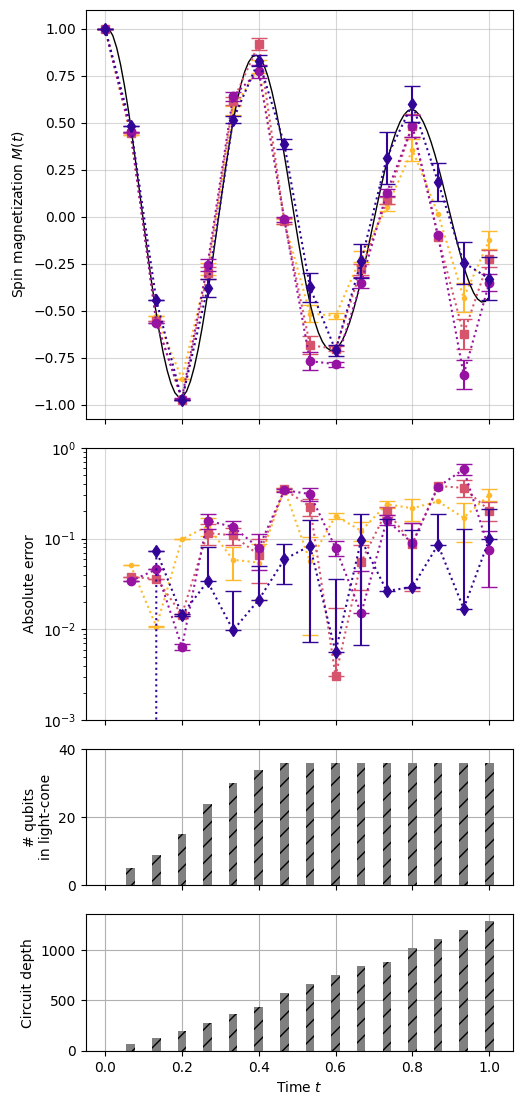

In [3]:
from scipy.interpolate import CubicSpline # smooth out the noiseless curve
plt.rc('axes', axisbelow=True)

def plot_evolution(expvals, std_errors, axis, color, marker, label, zorder=3):
    std_errors[np.isnan(std_errors)]=0
    interp_func = CubicSpline(np.append(0,_times), np.append(1,expvals))
    interp_func_upper = CubicSpline(np.append(0,_times), np.append(1,expvals+std_errors))
    interp_func_lower = CubicSpline(np.append(0,_times), np.append(1,expvals-std_errors))
    axis.scatter(np.append(0,_times), np.append(1, expvals), label=label, marker=marker, color=color, zorder=zorder+2)
    axis.fill_between(times, interp_func_lower(times), interp_func_upper(times), color=color, alpha=0.25, zorder=zorder)
    axis.plot(times, interp_func(times), color=color, ls=':', zorder=zorder+1)

_times = np.array(evcdr.results['times'])
raw_energies,raw_std = average_without_outliers(*zip(*evcdr.results['expvals']['raw'].values()))
density_purified,density_std = average_without_outliers(*zip(*evcdr.results['expvals']['density_purified'].values()))
purity_normalized,purity_std =average_without_outliers(*zip(*evcdr.results['expvals']['purity_normalized'].values()))
circuit_depths = list(evcdr.results['circuit_depths'].values())

with open('data/EVCDR/2/exact_evolution_35_q.json', 'r') as infile:
    import json
    exact_sim_data = json.load(infile)
    exact_sim_times = np.asarray(exact_sim_data['times'])
    exact_sim_steps = np.asarray(exact_sim_data['steps'])
    exact_sim_vals = np.asarray(exact_sim_data['vals'])    
with open('data/EVCDR/2/TNS_50_steps.json', 'r') as infile:
    import json
    data_in = json.load(infile)
    tns_times = np.array(data_in['times'])
    tns_evo = np.array(data_in['energy'])
    tns_chi = data_in['bond_dim']

evo_interp_func = np.poly1d(np.polyfit(tns_times, tns_evo, deg=12))
noiseless_energies = evo_interp_func(_times)
noiseless_energies[:exact_sim_vals.shape[0]-1] = exact_sim_vals[1:]
evo_interp_func = CubicSpline(np.append(0,_times), np.append(1,noiseless_energies))

plasma0=plt.cm.plasma_r(0.15)
plasma1=plt.cm.plasma_r(.45)
plasma2=plt.cm.plasma_r(.68)
plasma3=plt.cm.plasma_r(.93)

fig, axes = plt.subplots(4,1,figsize=(5,11), gridspec_kw={'height_ratios':[3,2,1,1]}, sharex=True)
fig.tight_layout()
times = np.linspace(0,1,100)

axes[0].plot(times, evo_interp_func(times), color='black', label='Noiseless', ls='-', lw=1)
eb1=axes[0].errorbar(np.append(0,_times), np.append(1,raw_energies), yerr=np.append(0,raw_std), label='EV (standard)', marker='.', capsize=6, ls=':', color=plasma0, zorder=1)
eb2=axes[0].errorbar(np.append(0,_times), np.append(1, density_purified), yerr=np.append(0,density_std), label='EV (spectral purification)', marker='o', capsize=6, ls=':', color=plasma2, zorder=7)
eb3=axes[0].errorbar(np.append(0,_times), np.append(1, purity_normalized), yerr=np.append(0,purity_std), label='EV (purity normalization)', marker='s', capsize=6, ls=':', color=plasma1, zorder=4)
eb4=axes[0].errorbar(np.append(0,_times), np.append(1, clifford_interpolated), yerr=np.append(0,clifford_std), label='EVCDR', marker='d', capsize=6, ls=':', color=plasma3, zorder=10)

clifford_dev = np.tile(clifford_std, (2,1)); clifford_dev[0,abs(clifford_interpolated-noiseless_energies)-clifford_std<0] = 0
eb4=axes[1].errorbar(_times, abs(clifford_interpolated-noiseless_energies), yerr=clifford_dev, marker='d', capsize=6, ls=':', color=plasma3, zorder=10)
raw_dev = np.tile(raw_std, (2,1)); raw_dev[0,abs(raw_energies-noiseless_energies)-raw_std<0] = 0
eb1=axes[1].errorbar(_times, abs(raw_energies-noiseless_energies), yerr=raw_dev, marker='.', capsize=6, ls=':', color=plasma0, zorder=1)
density_dev = np.tile(density_std, (2,1)); density_dev[0,abs(density_purified-noiseless_energies)-density_std<0] = 0
eb2=axes[1].errorbar(_times, abs(density_purified-noiseless_energies), yerr=density_dev, marker='o', capsize=6, ls=':', color=plasma2, zorder=7)
purity_dev = np.tile(purity_std, (2,1)); purity_dev[0,abs(purity_normalized-noiseless_energies)-purity_std<0] = 0
eb3=axes[1].errorbar(_times, abs(purity_normalized-noiseless_energies), yerr=purity_dev, marker='s', capsize=6, ls=':', color=plasma1, zorder=4)


axes[2].bar(_times, [len(qs)/2 for qs in evcdr.results['active_qubits'].values()], width=evcdr.step_size/6, color='grey', hatch='//', alpha=1)
axes[2].set_ylabel('# qubits\nin light-cone')
axes[2].set_yticks([0,20,40])
axes[2].grid()

axes[3].bar(_times, circuit_depths, width=evcdr.step_size/6, color='grey', hatch='//', alpha=1)
axes[3].set_ylabel('Circuit depth')
axes[3].grid()

axes[0].grid(alpha=0.5)
axes[1].grid(alpha=0.5)
axes[1].set_ylim(0.001,1)
axes[1].set_yscale('log')

axes[0].set_ylabel('Spin magnetization $M(t)$')
axes[1].set_ylabel('Absolute error')
axes[3].set_xlabel('Time $t$')
# axes[0].legend(ncol=3, loc='lower left', bbox_to_anchor=(-0.17,-1.81))

# fig.savefig('plots/35_qubit_spin_evolution.pdf', dpi=300, bbox_inches='tight', transparent=True)

In [4]:
# import json
# import numpy as np
# with open('data/IBM_evidence_comparison/EVCDR_data_compiled.json', 'r') as infile:
#     data_out = json.load(infile)
# # data_out = {}
# data_out["1"] = {
#     'n_qubits':35, 
#     'errors':abs(clifford_interpolated-noiseless_energies).tolist(), 
#     'angles':(_times).tolist(),
#     'nonlocal_depths': list(evcdr.results['circuit_nonlocal_depths'].values()),
#     'total_depths':list(evcdr.results['circuit_depths'].values()),
#     'n_qubits_lightcone':[int(len(qs)/2) for qs in evcdr.results['active_qubits'].values()]
# }
# with open('data/IBM_evidence_comparison/EVCDR_data_compiled.json', 'w') as outfile:
#     json.dump(data_out, outfile)

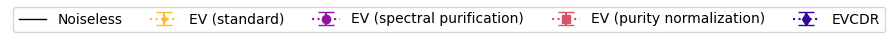

In [5]:
fig,axis=plt.subplots()
axis.plot(times, evo_interp_func(times), color='black', label='Noiseless', ls='-', lw=1)
eb1=axis.errorbar(np.append(0,_times), np.append(1,raw_energies), yerr=np.append(0,raw_std), label='EV (standard)', marker='.', capsize=6, ls=':', color=plasma0, zorder=1)
eb2=axis.errorbar(np.append(0,_times), np.append(1, density_purified), yerr=np.append(0,density_std), label='EV (spectral purification)', marker='o', capsize=6, ls=':', color=plasma2, zorder=7)
eb3=axis.errorbar(np.append(0,_times), np.append(1, purity_normalized), yerr=np.append(0,purity_std), label='EV (purity normalization)', marker='s', capsize=6, ls=':', color=plasma1, zorder=4)
eb4=axis.errorbar(np.append(0,_times), np.append(1, clifford_interpolated), yerr=np.append(0,clifford_std), label='EVCDR', marker='d', capsize=6, ls=':', color=plasma3, zorder=10)
axis.set_visible(False)
fig.legend(ncol=5)
# fig.savefig('plots/spin_evolution_legend.pdf', dpi=300, bbox_inches='tight', transparent=True)